<a href="https://colab.research.google.com/github/payalaggarwal177/Deepleaning-6thjuly/blob/main/Regression_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Regression with Keras

In [2]:
from warnings import filterwarnings
filterwarnings ('ignore')

## Step 1: Read the dataset

In [4]:
import pandas as pd
url = 'https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/main/PowerPlant.csv'
df = pd.read_csv(url)
df.head()

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


## Step 2 : perform basic data quality checks

In [5]:
df.shape

(9568, 5)

In [6]:
df.isna().sum()

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64

In [11]:
  df.duplicated().sum()/len(df)

0.004285117056856187

In [10]:
  df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [12]:
df = df.drop_duplicates(keep = 'first')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9527 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9527 non-null   float64
 1   V       9527 non-null   float64
 2   AP      9527 non-null   float64
 3   RH      9527 non-null   float64
 4   PE      9527 non-null   float64
dtypes: float64(5)
memory usage: 446.6 KB


## Seprate X and Y

In [14]:
x = df.drop(columns=['PE'])
y = df[['PE']]

In [15]:
x.head()

,AT,V,AP,RH
0,8.34,40.77,1010.84,90.01
1,23.64,58.49,1011.40,74.20
2,29.74,56.90,1007.15,41.91
3,19.07,49.69,1007.22,76.79
4,11.80,40.66,1017.13,97.20


In [16]:
y.head()

,PE
0,480.48
1,445.75
2,438.76
3,453.09
4,464.43


## Step 4 : Preprocessing x using pipeline

In [17]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [18]:
num_pipe = Pipeline(steps = [('impute', SimpleImputer(strategy = 'mean')),
                             ('scaler', StandardScaler())]).set_output(transform = 'pandas')

In [20]:
x_pre = num_pipe.fit_transform(x)
x_pre.head()

,AT,V,AP,RH
0,-1.520448,-1.066041,-0.403535,1.141599
1,0.534897,0.330813,-0.309262,0.059223
2,1.354348,0.205475,-1.024725,-2.151400
3,-0.079020,-0.362884,-1.012941,0.236538
4,-1.055645,-1.074713,0.655349,1.633837


## Apply Train test split

In [27]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x_pre, y, test_size=0.2, random_state=42)


In [28]:
xtrain.head()

,AT,V,AP,RH
5703,-0.152905,0.324507,0.089713,1.817999
7322,-1.497611,-1.153542,0.323712,0.908830
9105,-0.885038,-0.954892,0.293410,0.988245
6436,1.398679,1.223949,-0.479290,-1.082031
6790,-0.824586,-0.942279,0.796758,1.506499


In [29]:
ytrain.head()

,PE
5703,446.68
7322,483.54
9105,461.71
6436,437.38
6790,463.71


In [30]:
xtest.head()

,AT,V,AP,RH
1087,1.827212,1.120683,-0.125767,-1.414069
6319,-1.501641,-1.244984,0.044260,-0.467246
8052,-1.465370,-1.418408,0.399466,-1.082031
9524,0.150695,0.648495,0.731104,-0.002393
4463,-0.036032,1.128565,-0.361449,1.586599


In [31]:
ytest.head()

,PE
1087,429.38
6319,485.29
8052,480.40
9524,452.30
4463,446.47


In [32]:
xtrain.shape

(7621, 4)

In [33]:
xtest.shape

(1906, 4)

In [34]:
xtrain.shape[1]

4

## Bluid the neural network
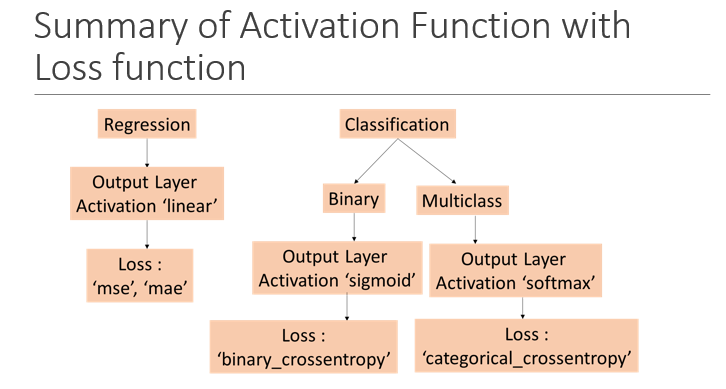

In [36]:
from keras.models import Sequential
from keras.layers import Dense, Input

In [39]:
# Intialize the model
model = Sequential ()

# Add input layer
model.add (Input(shape = (xtrain.shape[1],)))

# Add dense Hidden Layer 1
model.add (Dense(16, activation = 'relu'))

# Add hidden layer 2
model.add (Dense(1, activation = 'linear'))

# Add otput layer
model.add (Dense(1, activation = 'linear'))

In [41]:
# Compile the model
model.compile(loss = 'mse', metrics =['mae'], optimizer = 'adam')

In [43]:
hist = model.fit (xtrain, ytrain, validation_data = (xtest, ytest), epochs = 60)

Epoch 1/60
239/239 [==============================] - 3s 4ms/step - loss: 206051.8125 - mae: 453.6156 - val_loss: 204483.6250 - val_mae: 451.8760
Epoch 2/60
239/239 [==============================] - 1s 3ms/step - loss: 199054.8594 - mae: 445.8203 - val_loss: 190533.5000 - val_mae: 436.1593
Epoch 3/60
239/239 [==============================] - 1s 4ms/step - loss: 175016.4375 - mae: 417.6945 - val_loss: 155131.4688 - val_mae: 393.0972
Epoch 4/60
239/239 [==============================] - 1s 3ms/step - loss: 130989.5312 - mae: 359.5283 - val_loss: 104181.5859 - val_mae: 319.2785
Epoch 5/60
239/239 [==============================] - 1s 5ms/step - loss: 80484.4219 - mae: 275.0326 - val_loss: 57307.7500 - val_mae: 226.0571
Epoch 6/60
239/239 [==============================] - 1s 5ms/step - loss: 43086.5039 - mae: 187.2245 - val_loss: 30674.6484 - val_mae: 151.3812
Epoch 7/60
239/239 [==============================] - 1s 5ms/step - loss: 25721.8086 - mae: 138.1315 - val_loss: 21111.6309 - va

In [45]:
hist.history['loss']

[206051.8125,
 199054.859375,
 175016.4375,
 130989.53125,
 80484.421875,
 43086.50390625,
 25721.80859375,
 19674.6484375,
 16495.814453125,
 13788.9150390625,
 11231.8544921875,
 8838.890625,
 6685.140625,
 4838.15576171875,
 3377.09716796875,
 2304.265869140625,
 1566.928466796875,
 1067.63623046875,
 729.22412109375,
 501.37713623046875,
 350.0327453613281,
 249.90467834472656,
 184.61666870117188,
 141.7002716064453,
 112.86090850830078,
 93.08148193359375,
 78.83817291259766,
 68.11354064941406,
 59.99229431152344,
 53.31612777709961,
 47.73155212402344,
 43.0191764831543,
 39.04303741455078,
 35.68634033203125,
 32.75967788696289,
 30.31344223022461,
 28.25240707397461,
 26.52602767944336,
 25.271244049072266,
 24.089019775390625,
 23.249910354614258,
 22.60432243347168,
 22.006694793701172,
 21.615476608276367,
 21.3179931640625,
 21.132619857788086,
 20.811370849609375,
 20.786394119262695,
 20.659151077270508,
 20.480592727661133,
 20.428918838500977,
 20.302745819091797,
 20

In [46]:
hist.history['val_loss']

[204483.625,
 190533.5,
 155131.46875,
 104181.5859375,
 57307.75,
 30674.6484375,
 21111.630859375,
 17434.048828125,
 14714.6025390625,
 12156.505859375,
 9728.880859375,
 7497.37109375,
 5539.345703125,
 3916.1689453125,
 2681.05517578125,
 1810.017333984375,
 1228.0411376953125,
 834.0026245117188,
 572.1375732421875,
 396.7940979003906,
 280.8968200683594,
 204.90464782714844,
 155.75123596191406,
 122.87454986572266,
 99.85943603515625,
 84.02266693115234,
 71.92835235595703,
 63.86405944824219,
 55.8730354309082,
 50.25642013549805,
 44.995689392089844,
 40.73859405517578,
 37.28290939331055,
 34.057945251464844,
 31.329111099243164,
 29.119905471801758,
 27.560930252075195,
 26.003469467163086,
 24.60152244567871,
 23.726882934570312,
 22.895309448242188,
 22.73172378540039,
 22.06468391418457,
 21.510269165039062,
 21.279216766357422,
 21.254703521728516,
 21.094758987426758,
 20.738513946533203,
 20.682559967041016,
 20.520360946655273,
 20.45263671875,
 20.519886016845703,
 

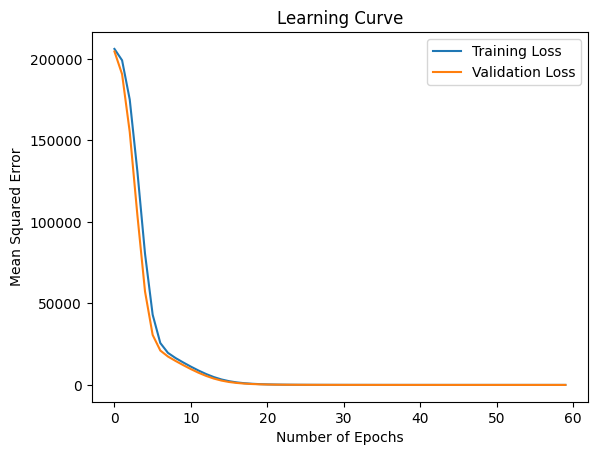

In [49]:
import matplotlib.pyplot as plt
plt.plot (hist.history['loss'], label ='Training Loss')
plt.plot (hist.history['val_loss'], label ='Validation Loss')
plt.xlabel('Number of Epochs')
plt.ylabel('Mean Squared Error')
plt.title('Learning Curve')
plt.legend()
plt.show()


In [50]:
model.evaluate(xtrain, ytrain)

239/239 [==============================] - 1s 2ms/step - loss: 20.0324 - mae: 3.4739


[20.032350540161133, 3.4739081859588623]

In [51]:
model.evaluate(xtest, ytest)

60/60 [==============================] - 0s 4ms/step - loss: 20.1027 - mae: 3.5027


[20.102724075317383, 3.5027287006378174]

## Predict the result fro train and test

In [52]:
ypred_train = model.predict(xtrain)
ypred_test = model.predict(xtest)

60/60 [==============================] - 0s 2ms/step


In [54]:
ypred_train[0:5]

array([[451.67825],
       [478.9042 ],
       [468.9132 ],
       [430.3668 ],
       [467.4075 ]], dtype=float32)

In [55]:
ypred_test[0:5]

array([[428.44974],
       [481.5271 ],
       [482.9605 ],
       [449.6023 ],
       [447.03775]], dtype=float32)

In [57]:
# R2 score in train
from sklearn.metrics import r2_score
r2_score(ytest, ypred_test)

0.933388307486706

### Because i have r2 score is more than > 80% so i can use this as out of sample data

In [58]:
url2 = 'https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/main/test_PowerPlant.csv'
xnew = pd.read_csv(url2)
xnew.head()

,AT,V,AP,RH
0,22.49,58.82,1009.73,85.19
1,28.88,54.89,1007.16,46.60
2,27.89,73.21,1001.32,85.88
3,25.69,62.26,1011.38,74.08
4,12.16,40.81,1025.79,70.97


In [60]:
num_pipe

Pipeline(steps=[('impute', SimpleImputer()), ('scaler', StandardScaler())])

In [62]:
xnew_pre = num_pipe.transform(xnew)
xnew_pre.head()

,AT,V,AP,RH
0,0.380410,0.356827,-0.590397,0.811615
1,1.238819,0.047028,-1.023041,-1.830315
2,1.105826,1.491180,-2.006171,0.858853
3,0.810286,0.628000,-0.312629,0.051007
4,-1.007284,-1.062888,2.113209,-0.161908


In [63]:
preds = model.predict(xnew_pre)
preds[0:5]

4/4 [==============================] - 0s 2ms/step


array([[444.94043],
       [437.6969 ],
       [428.88214],
       [439.0767 ],
       [474.4062 ]], dtype=float32)

In [64]:
xnew['PowerOutput_pred'] = preds

In [65]:
xnew

,AT,V,AP,RH,PowerOutput_pred
0,22.49,58.82,1009.73,85.19,444.940430
1,28.88,54.89,1007.16,46.60,437.696899
2,27.89,73.21,1001.32,85.88,428.882141
3,25.69,62.26,1011.38,74.08,439.076691
4,12.16,40.81,1025.79,70.97,474.406189
...,...,...,...,...,...
95,26.35,69.48,1008.45,70.47,435.730042
96,11.78,39.96,1011.37,82.95,472.296753
97,5.62,41.38,1020.91,86.21,484.875793
98,24.96,74.99,1008.25,80.52,435.648987


<Axes: xlabel='PowerOutput_pred', ylabel='Count'>

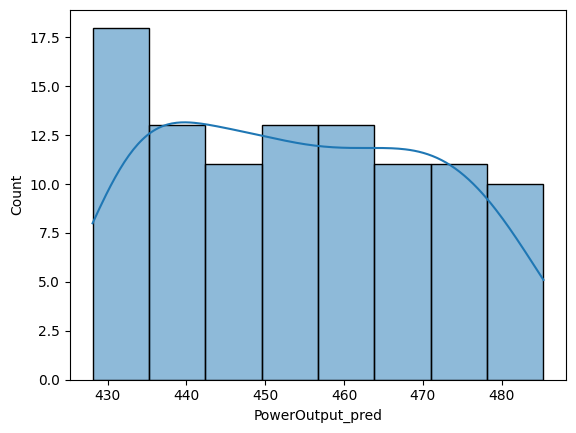

In [68]:
import seaborn as sns
sns.histplot(data = xnew, x= 'PowerOutput_pred', kde = True)

In [69]:
xnew.to_csv('Result.csv', index = False)